In [62]:
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset
import seaborn as sns
from matplotlib import rcParams
import pprint as pp
from sklearn import tree
import graphviz

rcParams['figure.figsize'] = 11.7,8.27 # figure size in inches

In [4]:
X_train, y_train, feature_names, label_names = load_dataset('birds', 'train')
X_test, y_test, _, _ = load_dataset('birds', 'test')

birds:train - exists, not redownloading
birds:test - exists, not redownloading


## Contain labels or not

In [42]:
zz_string=[]
zz_num=[]
y_sum = np.sum(y_train.todense(),axis=1)
for i in range(len(y_train.todense())):
    if np.sum(y_sum[i]) > 0:
        zz_string.append("has label")
        zz_num.append(1)
    else:
        zz.append("no label")
        zz_num.append(-1)

## Label Space Visualization

In [36]:
data_set = pd.DataFrame(y_train.todense(),columns=[label_names[x][0] for x in range(y_train.shape[1])])
from sklearn.manifold import TSNE
t_sne = TSNE()
t_sne.fit(data_set)
t_sne = pd.DataFrame(t_sne.embedding_, index=data_set.index)
t_sne.columns=["v1","v2"]
t_sne["label_exist"]=zz

<AxesSubplot:xlabel='v1', ylabel='v2'>

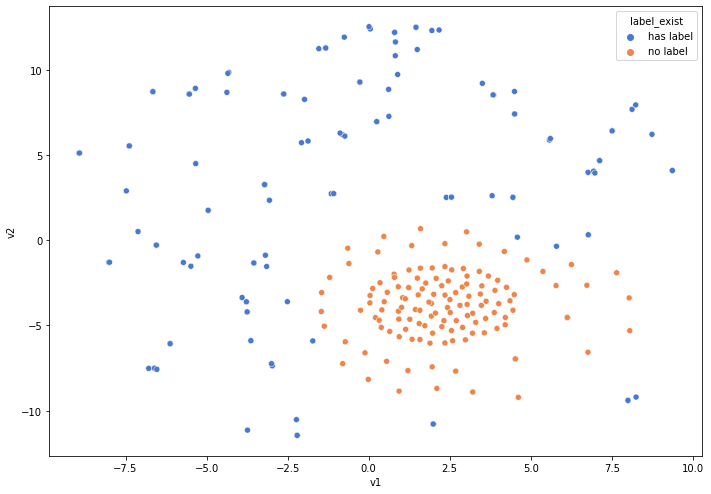

In [37]:
sns.scatterplot(data=t_sne, x="v1", y="v2",hue="label_exist",palette="muted")

## Feature Space Visualization

In [40]:
data_set = pd.DataFrame(X_train.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
from sklearn.manifold import TSNE
t_sne = TSNE()
t_sne.fit(data_set)
t_sne = pd.DataFrame(t_sne.embedding_, index=data_set.index)
t_sne.columns=["v1","v2"]
t_sne["label_exist"]=zz

<AxesSubplot:xlabel='v1', ylabel='v2'>

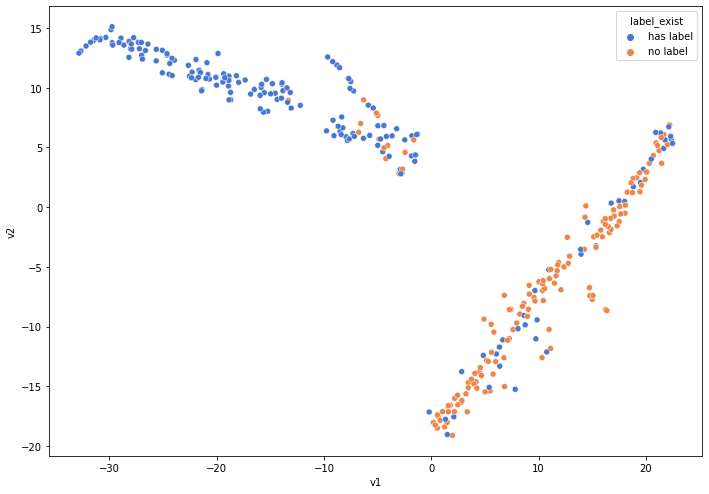

In [41]:
sns.scatterplot(data=t_sne, x="v1", y="v2",hue="label_exist",palette="muted")

## Binary Classification (Containing labels vs Not containing labels)

In [60]:
df_x = pd.DataFrame(X_train.todense(),columns=[feature_names[x][0] for x in range(X_train.shape[1])])
df_y=zz_num

In [54]:
pp.pprint(df.columns.tolist())

['audio-ssd1',
 'audio-ssd2',
 'audio-ssd3',
 'audio-ssd4',
 'audio-ssd5',
 'audio-ssd6',
 'audio-ssd7',
 'audio-ssd8',
 'audio-ssd9',
 'audio-ssd10',
 'audio-ssd11',
 'audio-ssd12',
 'audio-ssd13',
 'audio-ssd14',
 'audio-ssd15',
 'audio-ssd16',
 'audio-ssd17',
 'audio-ssd18',
 'audio-ssd19',
 'audio-ssd20',
 'audio-ssd21',
 'audio-ssd22',
 'audio-ssd25',
 'audio-ssd26',
 'audio-ssd27',
 'audio-ssd28',
 'audio-ssd29',
 'audio-ssd30',
 'audio-ssd31',
 'audio-ssd32',
 'audio-ssd33',
 'audio-ssd34',
 'audio-ssd35',
 'audio-ssd36',
 'audio-ssd37',
 'audio-ssd38',
 'audio-ssd39',
 'audio-ssd40',
 'audio-ssd41',
 'audio-ssd42',
 'audio-ssd43',
 'audio-ssd44',
 'audio-ssd45',
 'audio-ssd46',
 'audio-ssd49',
 'audio-ssd50',
 'audio-ssd51',
 'audio-ssd52',
 'audio-ssd53',
 'audio-ssd54',
 'audio-ssd55',
 'audio-ssd56',
 'audio-ssd57',
 'audio-ssd58',
 'audio-ssd59',
 'audio-ssd60',
 'audio-ssd61',
 'audio-ssd62',
 'audio-ssd63',
 'audio-ssd64',
 'audio-ssd65',
 'audio-ssd66',
 'audio-ssd67',
 

### Decision Tree

In [63]:
clf=tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=10)
clf.fit(df_x,df_y)
dot_comp = tree.export_graphviz(clf, out_file=None, feature_names=df_x.columns,
                                class_names=["no label","has label"],filled=True, rounded=True) 
graph = graphviz.Source(dot_comp) 
graph.render("birds_decision_tree")

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH